# Exploratory Data Analysis on Real-world vehicle emissions
European Commission report for the year 2021 - real life data from 600k vehicles
the dataset can be found here: https://www.kaggle.com/datasets/konradb/real-world-vehicle-emissions/data

## Goal:
The primary goal of our Exploratory Data Analysis (EDA) was to gain insights into the 2021 Cars Aggregated dataset, focusing on understanding vehicle fuel consumption and CO2 emissions across different manufacturers and under different testing protocols (OBFCM and WLTP). We aimed to uncover patterns, trends, and relationships within the data that could provide valuable insights into vehicle efficiency, environmental impact, and the consistency of testing methodologies.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\portfolio website\cars dataset\2021_Cars_Aggregated.csv")
df.head()

,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
0,KIA,PETROL,1025,6.39,5.56,0.82,14.78,145.50,126.76,18.74,14.78,6.33,5.60,0.72,12.93,144.17,127.66,16.51,12.93
1,SKODA,PETROL,2494,7.29,6.13,1.16,18.96,166.07,139.60,26.47,18.96,7.16,6.12,1.03,16.90,163.03,139.45,23.57,16.90
2,HYUNDAI CZECH,PETROL,1592,7.22,6.26,0.95,15.23,164.36,142.64,21.72,15.23,7.09,6.23,0.86,13.83,161.59,141.95,19.63,13.83
3,TOYOTA,PETROL,6338,5.60,4.99,0.61,12.27,127.52,113.59,13.93,12.27,5.67,5.05,0.62,12.30,129.15,115.00,14.14,12.30
4,MERCEDES-BENZ AG,PETROL,29995,10.53,8.46,2.07,24.45,239.83,192.71,47.13,24.45,10.68,8.67,2.01,23.12,243.30,197.61,45.68,23.12


In [3]:
# 1. Clean the Data
# Check for and handle missing values, for simplicity, we'll drop them
df.dropna(inplace=True)

# 2. Summary Statistics
print(df.describe())

       Number of vehicles  OBFCM Fuel consumption (l/100 km)  \
count           94.000000                          94.000000   
mean          6565.893617                           7.843511   
std          12322.674609                           3.284148   
min              1.000000                           3.870000   
25%            106.500000                           5.835000   
50%           1671.500000                           6.850000   
75%           6771.500000                           8.360000   
max          84828.000000                          20.060000   

       WLTP Fuel consumption (l/100 km)  \
count                         94.000000   
mean                           5.362128   
std                            3.047321   
min                            0.970000   
25%                            2.595000   
50%                            5.615000   
75%                            6.612500   
max                           15.970000   

       absolute gap Fuel consumptio

### Key takeaways:

Number of Vehicles: The mean number of vehicles per manufacturer is 6,565.89, with a wide range from just 1 vehicle up to 84,828 vehicles, indicating significant diversity in the dataset regarding the number of vehicles reported by each manufacturer. 

Fuel Consumption and CO2 Emissions: The average On-Board Fuel Consumption Monitoring (OBFCM) fuel consumption is 7.84 liters per 100 km, while the average Worldwide Harmonized Light Vehicles Test Procedure (WLTP) fuel consumption is lower at 5.36 liters per 100 km. This discrepancy is also reflected in the CO2 emissions data, where OBFCM CO2 emissions average at 185.65 g/km, compared to a lower WLTP CO2 emissions average of 127.75 g/km.

Gaps in Measurements: The absolute and percentage gaps in fuel consumption and CO2 emissions between OBFCM and WLTP measurements highlight the differences in testing methodologies or conditions. For instance, the mean absolute gap in fuel consumption is 2.48 liters per 100 km, with a percentage gap averaging at 94.97%. Similarly, for CO2 emissions, the mean absolute gap is 54.36 g/km, with a percentage gap averaging at 91.33%.

Relationship Between the Number of Vehicles and Emissions/Fuel Consumption Metrics: This will explore if there's any noticeable trend or pattern between the number of vehicles reported by manufacturers and their respective emissions or fuel consumption metrics.

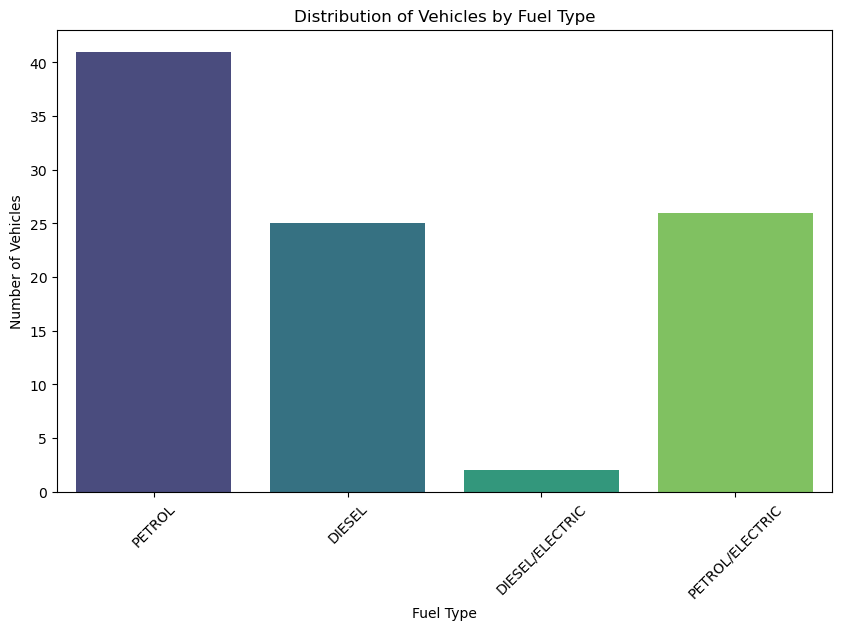

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fuel Type', palette='viridis')
plt.title('Distribution of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

The distribution of vehicles by fuel type shows the following:

Petrol: 41 records
Petrol/Electric (Hybrid): 26 records
Diesel: 25 records
Diesel/Electric (Hybrid): 2 records
This distribution highlights a significant representation of petrol and hybrid vehicles within the dataset, with diesel vehicles also well represented but slightly fewer than petrol. Diesel/electric hybrids have the least representation.

This distribution highlights a significant representation of petrol and hybrid vehicles within the dataset, with diesel vehicles also well represented but slightly fewer than petrol. Diesel/electric hybrids have the least representation.

Next, let's analyze the average fuel consumption and CO2 emissions by manufacturer to understand performance characteristics across different manufacturers.

In [5]:
# Grouping data by manufacturer and calculating mean for fuel consumption and CO2 emissions
manufacturer_means = df.groupby('Manufacturer').agg({
    'OBFCM Fuel consumption (l/100 km)': 'mean',
    'WLTP Fuel consumption (l/100 km)': 'mean',
    'OBFCM CO2 emissions (g/km)': 'mean',
    'WLTP CO2 emissions (g/km)': 'mean'
}).reset_index()

# Displaying the first few rows to check the result
manufacturer_means.head()

,Manufacturer,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km)
0,ALFA ROMEO,9.505000,7.225000,229.555,174.925
1,AUDI AG,7.543333,4.883333,180.360,118.350
2,AUDI HUNGARIA,8.140000,6.590000,197.955,160.280
3,AUDI SPORT,14.440000,11.540000,329.000,262.820
4,AUTOMOBILES CITROEN,5.940000,5.165000,144.865,125.910


Alfa Romeo has an average OBFCM fuel consumption of 9.51 liters per 100 km and a WLTP fuel consumption of 7.23 liters per 100 km. Its CO2 emissions average at 229.56 g/km (OBFCM) and 174.93 g/km (WLTP).
Audi AG shows lower averages in both fuel consumption (OBFCM: 7.54, WLTP: 4.88 liters per 100 km) and CO2 emissions (OBFCM: 180.36, WLTP: 118.35 g/km).
Audi Sport, representing high-performance vehicles, has significantly higher averages for both metrics (OBFCM fuel consumption: 14.44 liters per 100 km, WLTP fuel consumption: 11.54 liters per 100 km, OBFCM CO2 emissions: 329 g/km, WLTP CO2 emissions: 262.82 g/km).
Automobiles Citroen shows lower averages, indicating more fuel-efficient and lower-emission vehicles (OBFCM fuel consumption: 5.94 liters per 100 km, WLTP fuel consumption: 5.17 liters per 100 km, OBFCM CO2 emissions: 144.87 g/km, WLTP CO2 emissions: 125.91 g/km).

Next, we'll compare the OBFCM and WLTP measurements for fuel consumption and CO2 emissions to understand the differences between these testing methodologies.

In [7]:
# Calculating overall average differences between OBFCM and WLTP measurements for fuel consumption and CO2 emissions
average_differences = df.agg({
    'absolute gap Fuel consumption (l/100 km)': 'mean',
    'percentage gap Fuel consumption (%)': 'mean',
    'absolute gap CO2 emissions (g/km)': 'mean',
    'percentage gap CO2 emissions (%)': 'mean'
})

average_differences

absolute gap Fuel consumption (l/100 km)     2.481170
percentage gap Fuel consumption (%)         94.973723
absolute gap CO2 emissions (g/km)           58.011277
percentage gap CO2 emissions (%)            94.973723
dtype: float64

The comparison between OBFCM and WLTP measurements for fuel consumption and CO2 emissions reveals the following average differences:

Fuel Consumption:

The absolute gap between OBFCM and WLTP measurements is approximately 2.48 liters per 100 km.
The percentage gap is around 95%, indicating a significant disparity in fuel consumption measurements between these two methodologies.
CO2 Emissions:

The absolute gap between OBFCM and WLTP measurements for CO2 emissions is about 58.01 g/km.
The percentage gap, similar to fuel consumption, is also around 95%.
These differences highlight the variability in testing protocols and possibly the conditions under which these measurements were taken, with WLTP generally showing lower fuel consumption and CO2 emissions compared to OBFCM.

Finally, let's explore the relationship between the number of vehicles and emissions/fuel consumption metrics. Given the broad nature of this analysis, focusing on key metrics could provide meaningful insights. We'll start by examining if there's a correlation between the number of vehicles and the absolute gap in CO2 emissions.

In [8]:
import seaborn as sns

# Scatter plot to explore the relationship between the number of vehicles and the absolute gap in CO2 emissions
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number of vehicles', y='absolute gap CO2 emissions (g/km)', data=data)
plt.title('Relationship Between Number of Vehicles and Absolute Gap in CO2 Emissions')
plt.xlabel('Number of Vehicles')
plt.ylabel('Absolute Gap in CO2 Emissions (g/km)')
plt.xscale('log') # Using a logarithmic scale due to wide range in 'Number of vehicles'
plt.show()


NameError: name 'data' is not defined

<Figure size 1200x800 with 0 Axes>

The scatter plot exploring the relationship between the number of vehicles and the absolute gap in CO2 emissions (g/km) does not show a clear linear relationship. The data points are spread across the plot, indicating variability in the absolute gap in CO2 emissions across manufacturers with different numbers of vehicles. The use of a logarithmic scale for the number of vehicles helps in visualizing this relationship across a wide range of values.

This variability suggests that the absolute gap in CO2 emissions between OBFCM and WLTP measurements is influenced by factors beyond just the number of vehicles produced by a manufacturer. It could reflect differences in vehicle types, fuel efficiency technologies, or specific characteristics of the vehicles aggregated under each manufacturer.

Extra Analysis:

In [9]:
features = ['OBFCM Fuel consumption (l/100 km)', 'WLTP Fuel consumption (l/100 km)', 
            'OBFCM CO2 emissions (g/km)', 'WLTP CO2 emissions (g/km)']

for feature in features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


NameError: name 'data' is not defined

The histograms with Kernel Density Estimate (KDE) overlays provide insights into the distributions of fuel consumption (both OBFCM and WLTP measurements) and CO2 emissions (again, both OBFCM and WLTP measurements) within the dataset. Here are the inferences from these distributions:

OBFCM Fuel Consumption: The distribution appears right-skewed, indicating that while most vehicles have lower fuel consumption rates, there is a long tail of vehicles with higher fuel consumption. This suggests a variety of vehicle efficiencies, with a significant number of vehicles being more fuel-efficient and a smaller number consuming more fuel.

WLTP Fuel Consumption: Similar to the OBFCM fuel consumption, the WLTP fuel consumption distribution is also right-skewed but appears to have a slightly narrower range. This indicates that the WLTP measurements generally report lower fuel consumption rates compared to OBFCM, aligning with the earlier noted differences between these testing methodologies.

OBFCM CO2 Emissions: The distribution of OBFCM CO2 emissions is right-skewed, showing that most vehicles have lower emission rates, but there is a tail of vehicles with significantly higher emissions. This pattern reflects a broad range of vehicle emissions performances, with many vehicles being lower in emissions and a few being considerably higher.

WLTP CO2 Emissions: The distribution for WLTP CO2 emissions similarly exhibits a right-skewed pattern but is notably shifted towards lower emissions compared to OBFCM measurements. This reinforces the observation that WLTP tends to report lower emissions, possibly due to differences in testing conditions or methodologies.

Overall, these distributions emphasize the variability in vehicle fuel efficiencies and emissions within the dataset, with a general trend towards lower fuel consumption and emissions in the WLTP measurements compared to OBFCM. The skewness in these distributions suggests that while a majority of vehicles are designed to be more fuel-efficient and emit less CO2, there are still significant numbers of vehicles that consume more fuel and emit more CO2, indicating potential areas for improvement in vehicle design and performance.

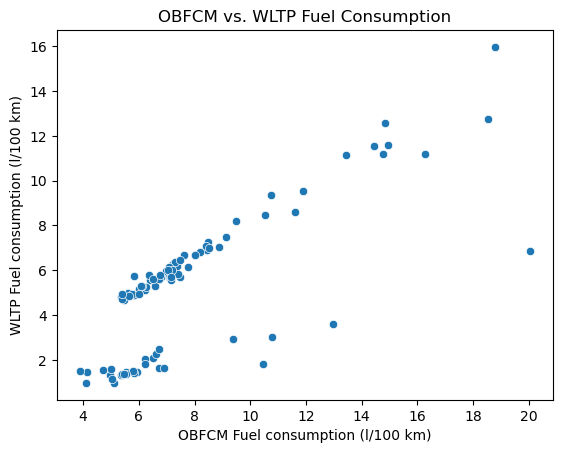

In [10]:
# Fuel Consumption Analysis
# Scatter plot comparing OBFCM and WLTP fuel consumption
sns.scatterplot(data=df, x='OBFCM Fuel consumption (l/100 km)', y='WLTP Fuel consumption (l/100 km)')
plt.title('OBFCM vs. WLTP Fuel Consumption')
plt.show()

The scatter plot comparing OBFCM and WLTP fuel consumption measurements shows a positive correlation between these two variables, indicating that as the OBFCM fuel consumption increases, the WLTP fuel consumption also tends to increase. This positive relationship suggests that, generally, vehicles with higher fuel consumption measured under OBFCM conditions will also show higher consumption under WLTP conditions, and vice versa.

However, it's noteworthy that the points do not lie perfectly along a straight line, implying some variability in how these two testing methodologies correlate on a case-by-case basis. This variability could be due to differences in testing conditions, vehicle types, driving scenarios, or other factors that each method accounts for differently.

This analysis reaffirms that while OBFCM and WLTP measurements are related and tend to move together, they are not identical and can vary for specific vehicles. Understanding these differences is crucial for manufacturers, regulators, and consumers to accurately assess vehicle performance under different conditions. ​

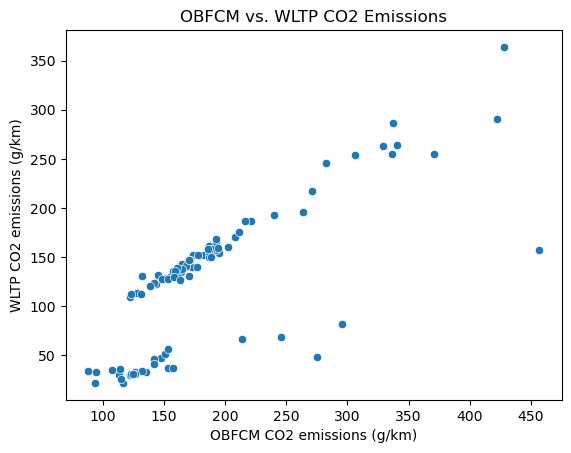

In [11]:
# CO2 Emissions Analysis
# Scatter plot comparing OBFCM and WLTP CO2 emissions
sns.scatterplot(data=df, x='OBFCM CO2 emissions (g/km)', y='WLTP CO2 emissions (g/km)')
plt.title('OBFCM vs. WLTP CO2 Emissions')
plt.show()

The scatter plot comparing OBFCM to WLTP CO2 emissions shows a positive correlation between these two sets of emissions measurements. This means that vehicles with higher CO2 emissions as measured by the OBFCM method also tend to have higher emissions when measured by the WLTP method, and similarly for lower emissions.

The positive correlation suggests consistency between the two measurement methods in terms of ranking vehicles by their emissions levels. However, similar to the fuel consumption analysis, the points do not align perfectly along a straight line. This indicates that while there is a general agreement between OBFCM and WLTP measurements, there are differences in the exact CO2 emissions figures reported by each method for the same vehicles. These differences could stem from the specific conditions under which each testing protocol operates, including the test cycles used, the driving conditions simulated, and other methodological differences.

C:\Users\kil\AppData\Local\Temp\ipykernel_13764\2324756822.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


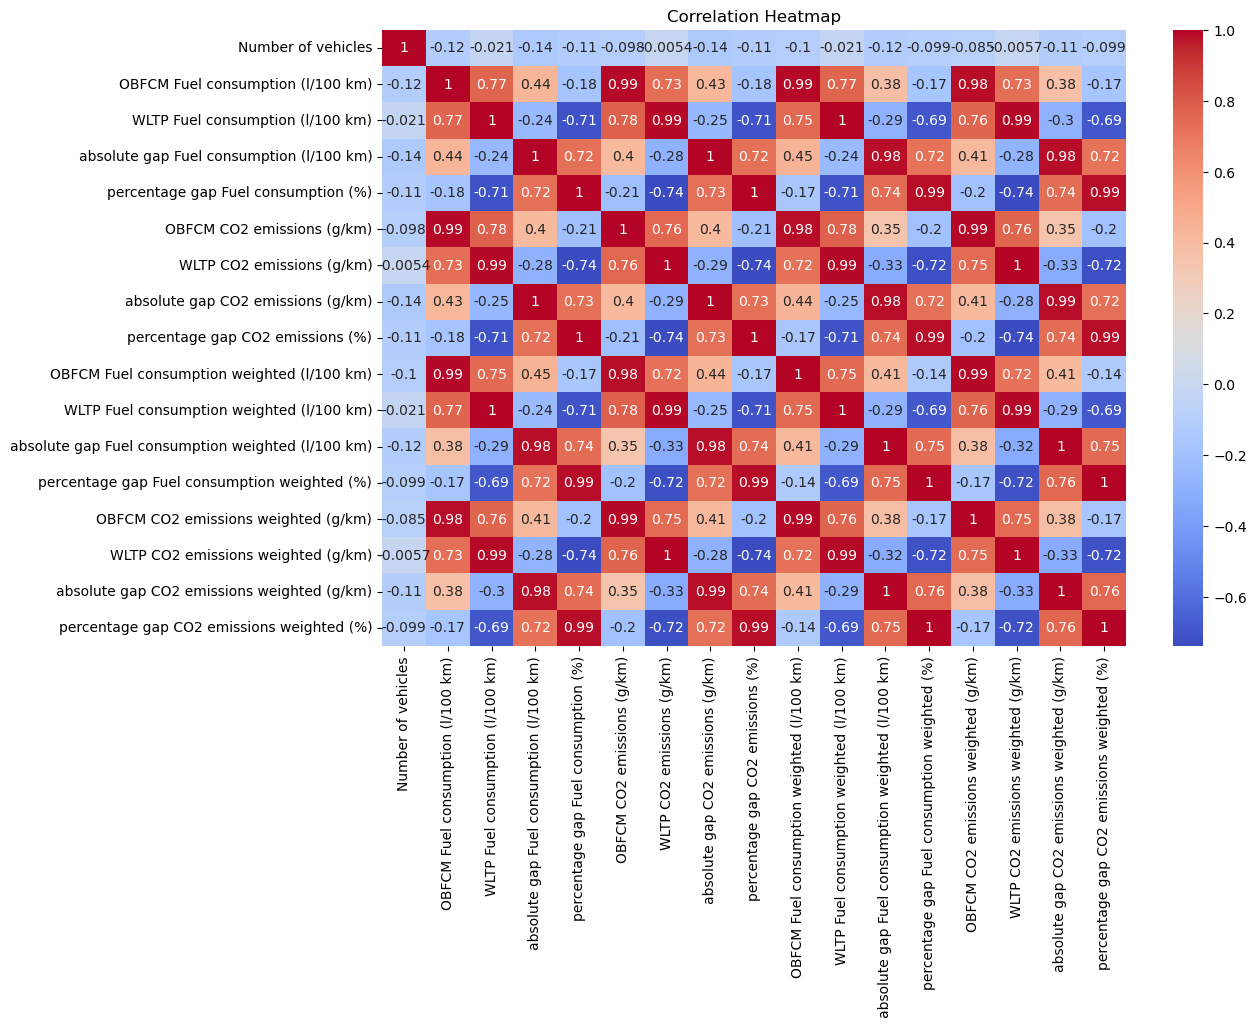

In [13]:
# Heatmap to show correlations between all numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reveals several key insights about the relationships between numerical features in the dataset:

Fuel Consumption Correlations: There's a strong positive correlation between OBFCM and WLTP fuel consumption measurements. This suggests that, generally, vehicles with higher fuel consumption according to OBFCM also have higher consumption according to WLTP, and vice versa.

CO2 Emissions Correlations: Similar to fuel consumption, there's a strong positive correlation between OBFCM and WLTP CO2 emissions measurements. This indicates consistency in ranking vehicles by their emissions levels across the two testing methodologies.

Fuel Consumption and CO2 Emissions: There are strong positive correlations between fuel consumption and CO2 emissions, both within the same measurement methodology (OBFCM or WLTP) and across methodologies. This is expected, as higher fuel consumption typically leads to higher CO2 emissions.

Gaps and Percentage Gaps: The absolute and percentage gaps in fuel consumption and CO2 emissions also show interesting relationships with the base measurements, reflecting how these gaps vary in relation to the original OBFCM and WLTP figures.

This heatmap provides a comprehensive overview of how different aspects of vehicle performance are interrelated, particularly highlighting the strong connections between fuel consumption and CO2 emissions, as well as the consistency between OBFCM and WLTP measurements.

# Conclusion
This EDA provided a multifaceted look at the dataset, leveraging statistical summaries, distribution analyses, comparative studies, and correlation assessments to understand the complexities of vehicle fuel consumption and CO2 emissions data. The insights gained not only shed light on the specific dataset but also highlighted the broader implications of vehicle testing methodologies and environmental impact considerations.